In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
dataset_sizes = [2016, 4032, 10080, 20160, 50400, 100800, 201600, 403200]
opendc_times = [5.26, 8.82, 16.59, 30.83, 73.31, 147.11, 290.40, 582.76]
opendc_sd = [0.56, 1.09, 0.71, 0.82, 1.07, 1.76, 5.09, 26.09]

m3sa_times = [1.35, 1.74, 2.05, 3.68, 10.91, 23.71, 50.72, 111.43]
m3sa_sd = [0.33, 0.29, 0.21, 0.23, 0.48, 1.97, 1.82, 10.31]
ratio_times = np.array(m3sa_times) / np.array(opendc_times)

days_labels = ['7 days', '14 days', '35 days', '70 days', '175 days', '1 year ', '2 years', '3.8 years']


# Figure from the paper

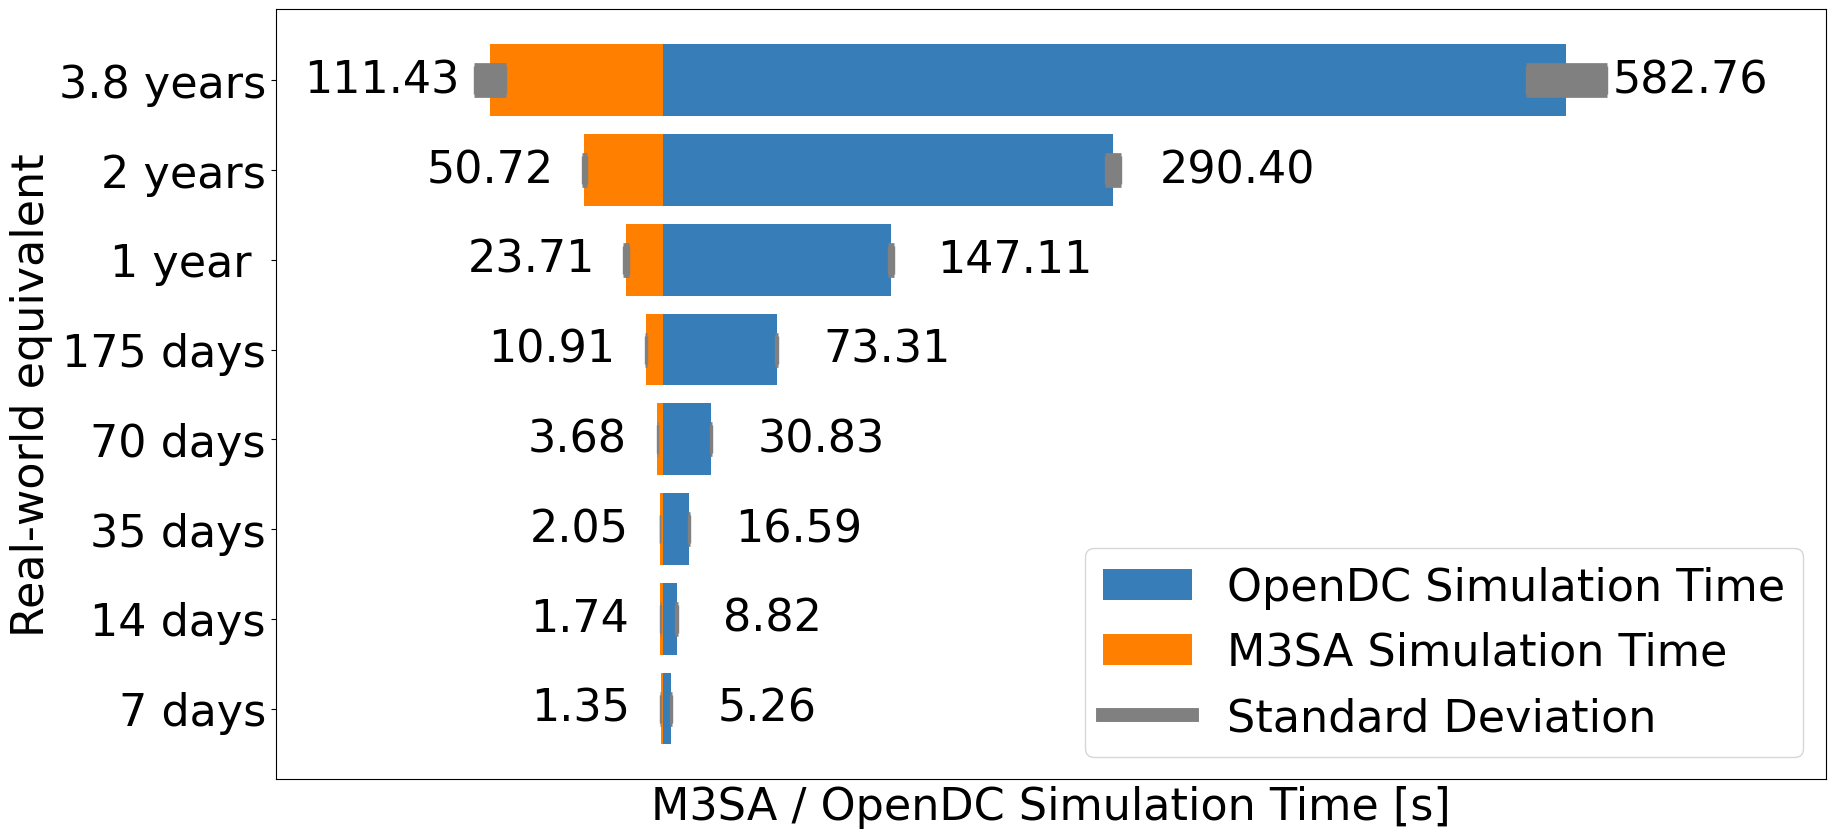

In [3]:
fig, ax = plt.subplots(figsize=(20, 10))

# Create an index for each tick position
ind = np.arange(len(dataset_sizes))

# Create bars for OpenDC and M3SA times
error_kw = {'capsize': 10, 'elinewidth': 25, 'ecolor': 'gray'}
opendc_bars = ax.barh(ind, opendc_times, xerr=opendc_sd, color='#377eb8', label='OpenDC Simulation Time', error_kw=error_kw)
m3sa_bars = ax.barh(ind, [-t for t in m3sa_times], xerr=m3sa_sd, color='#ff7f00', label='M3SA Simulation Time', error_kw=error_kw)


ax.set_xlabel('M3SA / OpenDC Simulation Time [s]', fontsize=32)
ax.set_ylabel('Real-world equivalent', fontsize=32)
ax.set_yticks(ind)
ax.set_xticks([])
ax.set_yticklabels(days_labels, fontsize=32)
ax.set_xlim(-250, 750)  # Adjust x-limits to ensure error bars fit within the plot
ax.legend(fontsize=32)

# Adjusting label positions and sizes to avoid overlap
offset = 20
i = 0
for bars in [opendc_bars, m3sa_bars]:
    for bar in bars:
        width = bar.get_width()
        if width < 0:
            label_x_pos = bar.get_x() + width - offset
            ha = 'right'
        else:
            if i == 0:
                label_x_pos = bar.get_x() + width + offset * 1.5
            else:
                label_x_pos = bar.get_x() + width + offset
            ha = 'left'

        ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2., '%.2f' % abs(width),
                va='center', ha='right' if width < 0 else 'left', fontsize=32)


    i += 1


# Create custom legend handles
legend_elements = [
    Patch(facecolor='#377eb8', label='OpenDC Simulation Time'),
    Patch(facecolor='#ff7f00', label='M3SA Simulation Time'),
    Line2D([0], [0], color='gray', lw=10, label='Standard Deviation')  # Custom handle for standard deviation
]

# Add legend to the plot with custom handles
ax.legend(handles=legend_elements, fontsize=32)


plt.savefig("fig-exp1-nfr1.pdf", bbox_inches='tight')

# Miscellaneous figures

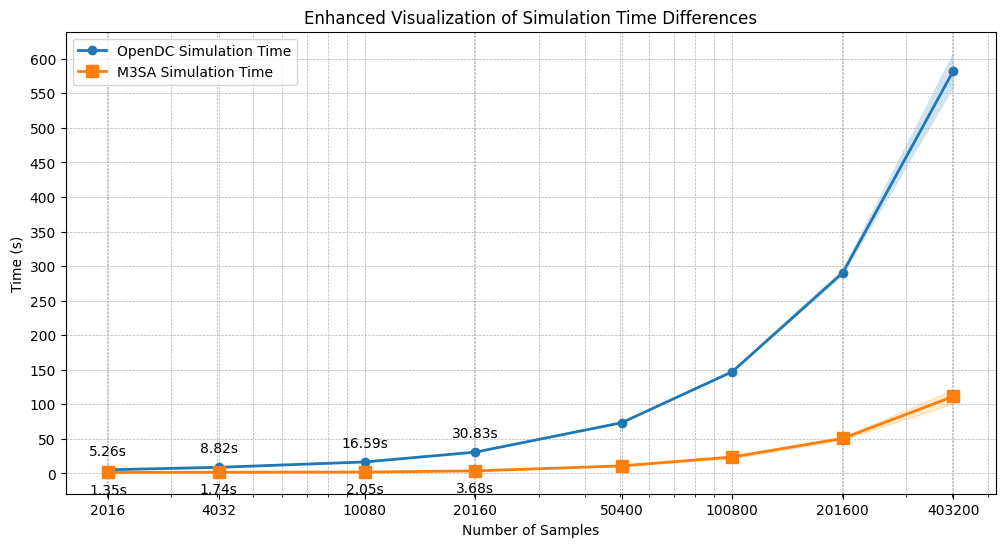

In [4]:
plt.figure(figsize=(12, 6))
# OpenDC line plot
plt.plot(dataset_sizes, opendc_times, label='OpenDC Simulation Time', marker='o', linewidth=2)
plt.fill_between(dataset_sizes, np.array(opendc_times) - np.array(opendc_sd),
                 np.array(opendc_times) + np.array(opendc_sd), alpha=0.2)

# M3SA line plot with thicker line and bigger markers
plt.plot(dataset_sizes, m3sa_times, label='M3SA Simulation Time', marker='s', linewidth=2, markersize=8)
plt.fill_between(dataset_sizes, np.array(m3sa_times) - np.array(m3sa_sd),
                 np.array(m3sa_times) + np.array(m3sa_sd), alpha=0.2, color='orange')

# Adding annotations for the first few points to highlight differences
for size, opdc_time, m3sa_time in zip(dataset_sizes[:4], opendc_times[:4], m3sa_times[:4]):
    plt.annotate(f'{opdc_time:.2f}s', (size, opdc_time + 1), textcoords="offset points", xytext=(0, 10), ha='center')
    plt.annotate(f'{m3sa_time:.2f}s', (size, m3sa_time - 1), textcoords="offset points", xytext=(0, -15), ha='center')

plt.xscale('log')
plt.yscale('linear')
plt.xticks(dataset_sizes, labels=[str(size) for size in dataset_sizes])
plt.yticks(np.arange(0, 601, 50))

plt.xlabel('Number of Samples')
plt.ylabel('Time (s)')
plt.title('Enhanced Visualization of Simulation Time Differences')
plt.legend()
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()


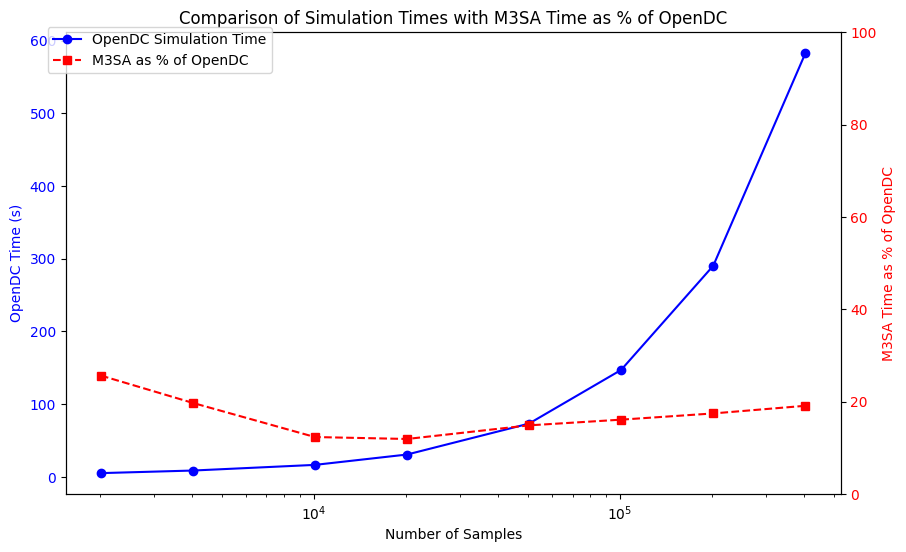

In [5]:
# Data setup
dataset_sizes = [2016, 4032, 10080, 20160, 50400, 100800, 201600, 403200]
opendc_times = [5.26, 8.82, 16.59, 30.83, 73.31, 147.11, 290.40, 582.76]
m3sa_times = [1.35, 1.74, 2.05, 3.68, 10.91, 23.71, 50.72, 111.43]

# Calculate M3SA times as a percentage of OpenDC times
m3sa_as_percentage_of_opendc = [(m / o * 100) for m, o in zip(m3sa_times, opendc_times)]

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot OpenDC times
ax1.plot(dataset_sizes, opendc_times, label='OpenDC Simulation Time', marker='o', color='blue')
ax1.set_ylabel('OpenDC Time (s)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for the percentage
ax2 = ax1.twinx()
ax2.plot(dataset_sizes, m3sa_as_percentage_of_opendc, label='M3SA as % of OpenDC', marker='s', linestyle='--', color='red')
ax2.set_ylabel('M3SA Time as % of OpenDC', color='red')
ax2.set_ylim(0, 100)  # Limit to 100% to show ratios clearly
ax2.tick_params(axis='y', labelcolor='red')

# General settings
ax1.set_xscale('log')
ax1.set_xlabel('Number of Samples')
ax1.set_title('Comparison of Simulation Times with M3SA Time as % of OpenDC')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()

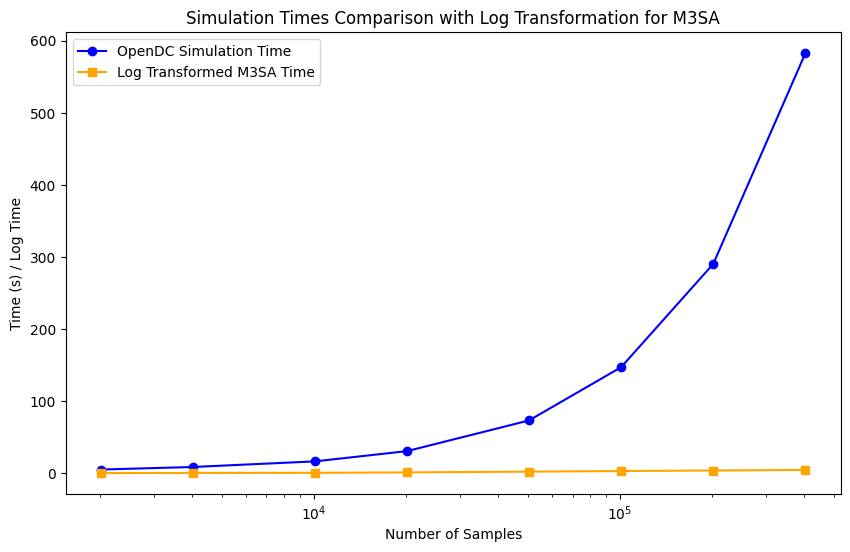

In [6]:
# Apply a logarithmic transformation to M3SA times to lower their visual representation
log_m3sa_times = np.log(m3sa_times)  # Natural log to reduce the scale dramatically

fig, ax = plt.subplots(figsize=(10, 6))

# Plot OpenDC times as normal
ax.plot(dataset_sizes, opendc_times, label='OpenDC Simulation Time', marker='o', color='blue')

# Plot transformed M3SA times
ax.plot(dataset_sizes, log_m3sa_times, label='Log Transformed M3SA Time', marker='s', color='orange')

# Customizing the plot
ax.set_xscale('log')
ax.set_yscale('linear')  # Linear scale to better compare the actual values and transformed values
ax.set_xlabel('Number of Samples')
ax.set_ylabel('Time (s) / Log Time')
ax.set_title('Simulation Times Comparison with Log Transformation for M3SA')
ax.legend()

plt.show()

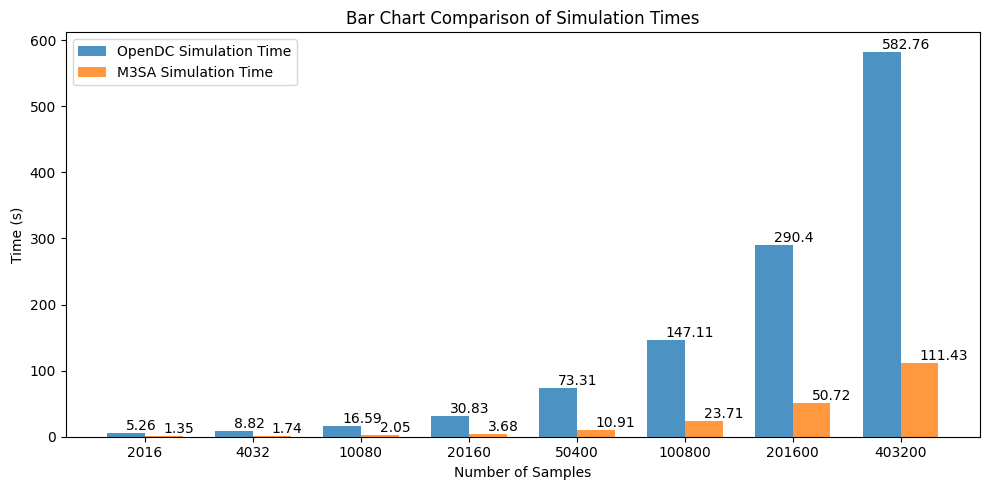

In [7]:
# Bar width
bar_width = 0.35

# Index for the bars
index = np.arange(len(dataset_sizes))

plt.figure(figsize=(10, 5))
bar1 = plt.bar(index, opendc_times, bar_width, label='OpenDC Simulation Time', alpha=0.8)
bar2 = plt.bar(index + bar_width, m3sa_times, bar_width, label='M3SA Simulation Time', alpha=0.8)

plt.xlabel('Number of Samples')
plt.ylabel('Time (s)')
plt.title('Bar Chart Comparison of Simulation Times')
plt.xticks(index + bar_width / 2, [str(size) for size in dataset_sizes])
plt.yscale('linear')
plt.legend()


# Adding data labels to bars
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  # va: vertical alignment

add_labels(bar1)
add_labels(bar2)

plt.tight_layout()
plt.show()